In [1]:
# 1. Install necessary libraries
!pip install seaborn xgboost

In [2]:
# 2. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [4]:
# 3. Load dataset
# Load the dataset from a source, like Kaggle or a local CSV file. In this case, we'll use a popular medical insurance dataset.
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
data = pd.read_csv(url)
data.head()  # Display the first 5 rows

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# 4. Data Preprocessing

In [5]:
# 4.1. Remove Unwanted Columns
# Let’s assume there’s no need to remove columns, but you can filter out any unnecessary data as needed.
# Check for null values
data.isnull().sum()

# Removing any unwanted columns (none for this dataset)
# Example: data.drop(['unwanted_column'], axis=1, inplace=True)

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [6]:
# 4.2. Convert Categorical Variables
# Convert categorical variables like sex, smoker, and region using One-Hot Encoding.
# Convert categorical variables into dummy/indicator variables
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [7]:
# 4.3. Scale Numerical Features
# Some machine learning algorithms perform better when features are scaled.
# Scaling numerical features
scaler = StandardScaler()
numerical_features = ['age', 'bmi', 'children']
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])
data_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,16884.92400,False,True,False,False,True
1,-1.509965,0.509621,-0.078767,1725.55230,True,False,False,True,False
2,-0.797954,0.383307,1.580926,4449.46200,True,False,False,True,False
3,-0.441948,-1.305531,-0.908614,21984.47061,True,False,True,False,False
4,-0.513149,-0.292556,-0.908614,3866.85520,True,False,True,False,False


In [ ]:
# 5. Exploratory Data Analysis (EDA)

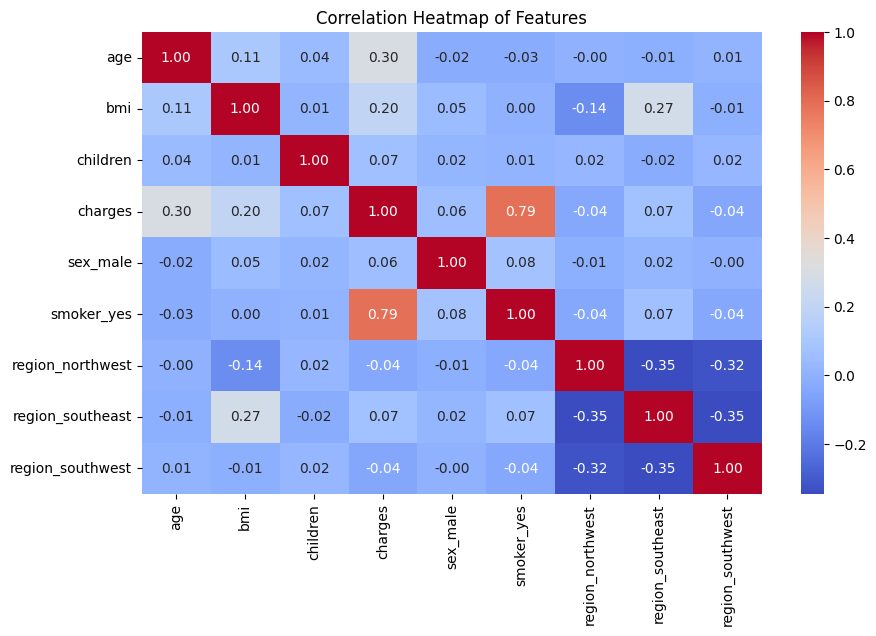

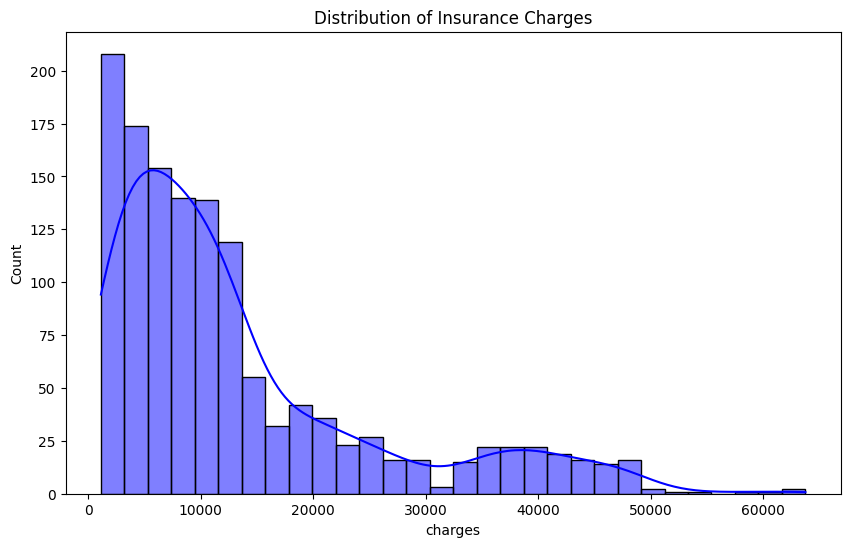

In [8]:
# 5.1. Visualizing Data Relationships
# We can start by understanding the relationships between different variables and the target variable (insurance premium).
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Features")
plt.show()

# Distribution of the target variable 'charges'
plt.figure(figsize=(10,6))
sns.histplot(data_encoded['charges'], kde=True, color='blue')
plt.title("Distribution of Insurance Charges")
plt.show()

<ipython-input-9-c774181e2726>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker_yes', y='charges', data=data_encoded, palette="rainbow")


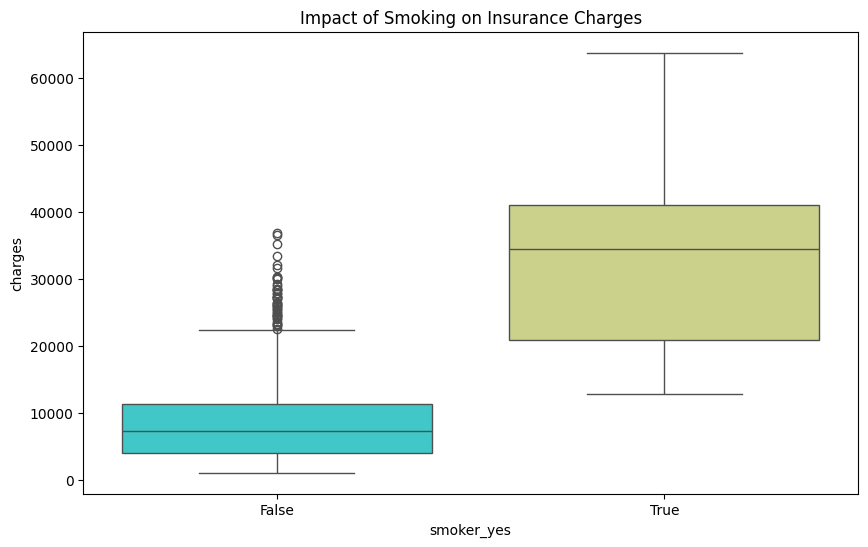

In [9]:
# 5.2. Visualizing Categorical vs. Charges
# For example, let's visualize how smoking affects the insurance charges.
plt.figure(figsize=(10,6))
sns.boxplot(x='smoker_yes', y='charges', data=data_encoded, palette="rainbow")
plt.title("Impact of Smoking on Insurance Charges")
plt.show()

In [ ]:
# 6. Model Building

In [10]:
# 6.1. Splitting Data
# We’ll split the data into training and testing sets.
# Define X (features) and y (target)
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 6.2. Applying Regression Models

In [13]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred_lr = linear_model.predict(X_test)

# Evaluation
print("Linear Regression R^2:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression R^2: 0.7835929767120722
Linear Regression RMSE: 5796.284659276274


In [14]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest R^2:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Random Forest R^2: 0.8655948876523016
Random Forest RMSE: 4567.956129166466


In [15]:
# XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("XGBoost R^2:", r2_score(y_test, y_pred_xgb))
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))

XGBoost R^2: 0.8490505887407566
XGBoost RMSE: 4840.9404682796485


<ipython-input-16-941048059ce7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_scores, palette='coolwarm')


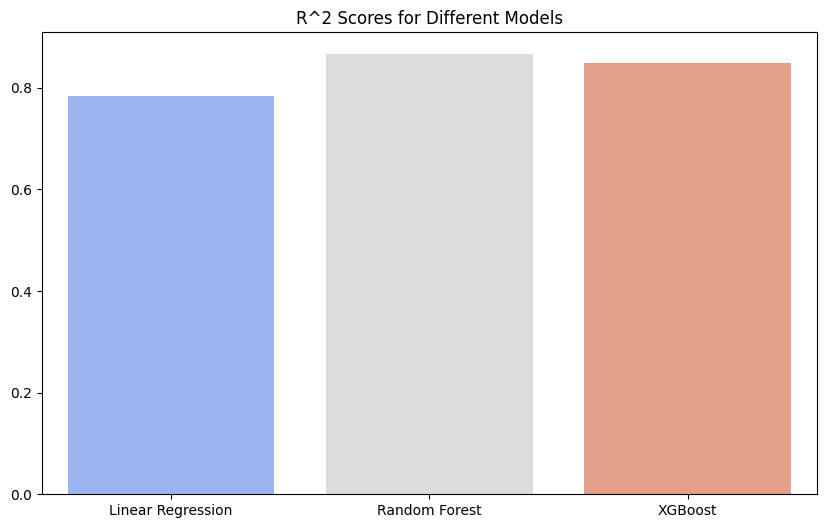

<ipython-input-16-941048059ce7>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=rmse_scores, palette='rainbow')


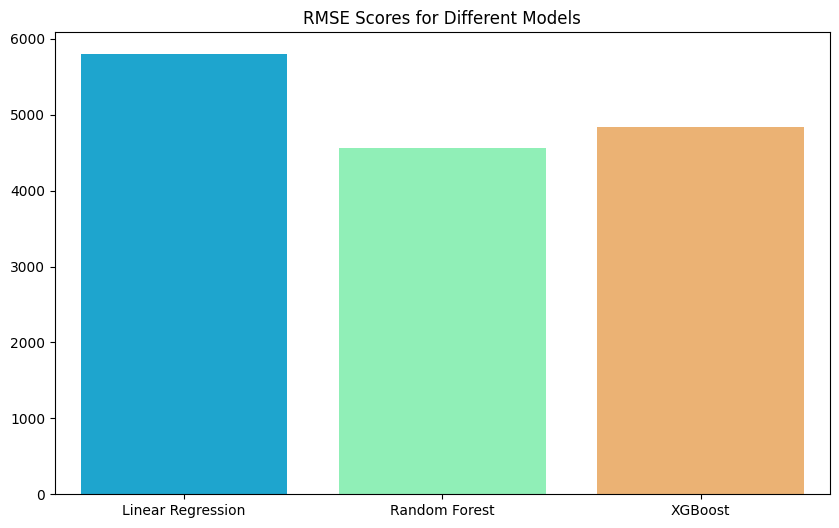

In [16]:
# 7. Model Comparison
# Compare the performance of different models using visualizations.
# Visualize the performance of each model
models = ['Linear Regression', 'Random Forest', 'XGBoost']
r2_scores = [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_rf), r2_score(y_test, y_pred_xgb)]
rmse_scores = [np.sqrt(mean_squared_error(y_test, y_pred_lr)),
               np.sqrt(mean_squared_error(y_test, y_pred_rf)),
               np.sqrt(mean_squared_error(y_test, y_pred_xgb))]

# Plotting R^2 scores
plt.figure(figsize=(10,6))
sns.barplot(x=models, y=r2_scores, palette='coolwarm')
plt.title("R^2 Scores for Different Models")
plt.show()

# Plotting RMSE scores
plt.figure(figsize=(10,6))
sns.barplot(x=models, y=rmse_scores, palette='rainbow')
plt.title("RMSE Scores for Different Models")
plt.show()